# Chapter 3 - Classification

In [12]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [13]:
# data: array with one row per instance and one column per feature
# target: an array with labels
X, y = mnist["data"], mnist["target"]

# 70000 images with 784 features (28x28 pixels) each
X.shape

(70000, 784)

In [14]:
y.shape

(70000,)

**Display a digit**

Grabbing an instance's feature vector and reshaping it into a 28x28 array

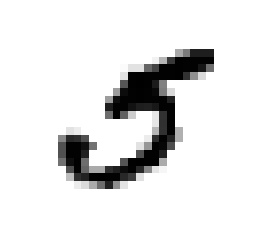

In [15]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")

plt.axis("off")
plt.show()

In [16]:
print("This was a", y[36000])

This was a 5.0


### Creating the sets

In [17]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

**Shuffling the sets to avoid similar instances in a row**

In [18]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

### Stochastig Gradient Descent classifier

**Binary Classifier**, identifying if a digit is 5 or not.

In [26]:
y_train_5 = (y_train == 5) # 60000 bools
y_test_5 = (y_test == 5) # 10000 bools

SGD classifier

In [20]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

/home/adrian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

**Predicting a digit**

In [22]:
sgd_clf.predict([some_digit]) # the 5 we displayed earlier

array([ True])

### Evaluating the classifier (Performance Measure)

Evaluating a classifier is often significantly trickier than evaluating a regressor

K-fold cross-validation means splitting the training set into K-folds, then making predictions and evaluating them on each fold using a model trained on the remaining folds.

In [21]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

/home/adrian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/adrian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/adrian/ana

array([0.96355, 0.9582 , 0.84595])

Comparing the accuracy to a dumb classify-everything-as-not-5 class:

In [27]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        #numpy 2d array of zeros
        return np.zeros((len(X), 1), dtype=bool)

In [28]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9078 , 0.90945, 0.9117 ])

**Confusion matrix > K-fold cross-validation** on classifier

In [29]:
from sklearn.model_selection import cross_val_predict

# performs K-fold cross-validation, but instead of returning the evaluation scores,
# it returns the predictions made on each test fold.
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

/home/adrian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/adrian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/adrian/ana

Confusion matrix

In [32]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[51391,  3188],
       [ 1458,  3963]])

Each row in c.matrix represents an actual class, while each column represents a predicted class.

The first row of this matrix considers non-5 images (**the negative class**): 51,391 of them were correctly classified as non-5s (*true negatives*), while the remaining 34,188 wrongly classified as 5s (*false positives*). 
The second row considers the images of 5s (**the positive class**): 1,458 were wrongly classified as non-5s (*false-negatives*), while the remaining 3,963 were correctly classified as 5s (*true positives*).

A perfect classifier would have only true positives and true negatives.  
[50000, 0],    
[0, 50000]

#### Equations

Precision of the classifier: $precision = \frac{TP}{TP + FP}$, the accuracy of the positive predictions  
TP = true positives, FP = false positives.

Recall / true positive rate: $recall = \frac{TP}{TP+FN}$, the ratio of positive instances that are correctly detected by the classifier.  
FN = false negatives.